In [141]:
conda install -c anaconda quandl

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [140]:
conda install -c anaconda keras

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [65]:
conda install -c anaconda TensorFlow

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [164]:
import quandl
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf


#from tensorflow import keras
#from tensorflow.keras import backend
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
#from sklearn.metrics import mean_squared_error




In [165]:
quandl.ApiConfig.api_key = "zSe_bKsyRtCbBxWJ5HZ9"

In [166]:
StartDate_train = "2010-9-26"
EndDate_train = "2019-9-25"

StartDate_test = "2019-9-26"
EndDate_test = "2019-11-26"

live_data_train = quandl.get("CHRIS/CME_LC1", start_date = StartDate_train, 
                  end_date = EndDate_train)
feeder_data_train = quandl.get("CHRIS/CME_FC1", start_date = StartDate_train, 
                  end_date = EndDate_train)
corn_data_train = quandl.get("CHRIS/CME_C1", start_date = StartDate_train, 
                  end_date = EndDate_train)

live_data_test = quandl.get("CHRIS/CME_LC1", start_date = StartDate_test, 
                  end_date = EndDate_test)
feeder_data_test = quandl.get("CHRIS/CME_FC1", start_date = StartDate_test, 
                  end_date = EndDate_test)
corn_data_test = quandl.get("CHRIS/CME_C1", start_date = StartDate_test, 
                  end_date = EndDate_test)


#pulled from https://blog.quandl.com/api-for-commodity-data
#Corn = CHRIS/CME_C1
#Feeder Cattle = CHRIS/CME_FC1

In [167]:
live_data_train = live_data_train.reset_index()
live_data_test = live_data_test.reset_index()

feeder_data_train = feeder_data_train.reset_index()
feeder_data_test = feeder_data_test.reset_index()

corn_data_train = corn_data_train.reset_index()
corn_data_test = corn_data_test.reset_index()

live_data_test.tail()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
39,2019-11-20,118.55,119.525,118.150,119.350,0.525,119.300,16101.0,58764.0
40,2019-11-21,119.40,119.950,119.075,119.375,0.025,119.325,16562.0,54720.0
41,2019-11-22,119.10,119.350,118.250,118.775,0.650,118.675,13859.0,49852.0
42,2019-11-25,119.00,120.525,118.850,119.900,1.025,119.700,12958.0,45797.0
43,2019-11-26,119.90,120.775,119.600,120.725,0.700,120.400,9358.0,43454.0


In [168]:
corn_data_train.shape

(2267, 9)

In [169]:
live_data_train.shape

(2263, 9)

In [170]:
feeder_data_train.shape

(2264, 9)

In [171]:
feeder_data_train.head()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,2010-09-27,109.70,109.98,109.50,109.88,NaN,109.88,679.0,1287.0
1,2010-09-28,109.95,110.13,109.95,110.00,NaN,110.00,314.0,1321.0
2,2010-09-29,109.50,109.58,109.45,109.48,NaN,109.48,314.0,1321.0
3,2010-09-30,109.95,110.00,109.90,109.93,NaN,109.93,412.0,1320.0
4,2010-10-01,110.03,110.03,110.03,110.03,NaN,110.03,304.0,1214.0


In [172]:
cattle_merge_train = pd.merge(live_data_train, feeder_data_train, left_on = 'Date', right_on = 'Date', how = 'left')
com_merge_train = pd.merge(corn_data_train, cattle_merge_train, left_on = 'Date', right_on = 'Date', how = 'left')
com_merge_train.shape
#y = feeders, x = live, none = corn


(2267, 25)

In [173]:
cattle_merge_test = pd.merge(live_data_test, feeder_data_test, left_on = 'Date', right_on = 'Date', how = 'left')
com_merge_test = pd.merge(corn_data_test, cattle_merge_test, left_on = 'Date', right_on = 'Date', how = 'left')
com_merge_test.shape

(44, 25)

In [174]:
com_merge_train = com_merge_train.dropna()
com_merge_train.shape

(1312, 25)

In [175]:
com_merge_test = com_merge_test.dropna()
com_merge_test.shape

(36, 25)

In [176]:
com_merge_train.head()

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Open_x,...,Volume_x,Previous Day Open Interest_x,Open_y,High_y,Low_y,Last_y,Change_y,Settle_y,Volume_y,Previous Day Open Interest_y
853,2014-02-18,445.00,450.00,444.50,449.4,4.2,449.50,140856.0,332167.0,143.125,...,3170.0,12231.0,170.700,171.950,170.600,171.700,1.225,171.700,2951.0,12118.0
854,2014-02-19,448.50,455.25,448.25,454.6,4.2,453.75,243252.0,307257.0,143.725,...,4006.0,11113.0,171.650,172.100,171.000,171.150,0.525,171.175,2357.0,11190.0
855,2014-02-20,453.25,456.50,451.00,456.2,2.0,455.75,191899.0,268137.0,143.800,...,2803.0,9330.0,171.475,171.625,170.875,171.100,0.050,171.125,1607.0,10746.0
856,2014-02-21,455.50,456.50,450.25,452.2,2.6,453.00,145346.0,244376.0,144.950,...,4086.0,8240.0,171.225,171.600,170.625,170.675,0.425,170.700,1723.0,10249.0
857,2014-02-24,451.50,452.75,445.50,451.4,1.4,451.50,142118.0,200173.0,144.700,...,2708.0,6175.0,170.900,171.350,170.150,170.175,0.500,170.200,1969.0,9793.0


In [177]:
x_train = com_merge_train.iloc[:, 1:22]
y_train = com_merge_train.iloc[:, 22]

x_test = com_merge_test.iloc[:, 1:22]
y_test = com_merge_test.iloc[:, 22]

In [178]:
y_train.head()

853    171.700
854    171.175
855    171.125
856    170.700
857    170.200
Name: Settle_y, dtype: float64

In [179]:
#SVR attempt
svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.1)
svr_rbf.fit(x_train,y_train)
svr_rbf_confidence=svr_rbf.score(x_test,y_test)
print(f"SVR Confidence: {round(svr_rbf_confidence*100,2)}%")

SVR Confidence: -9690.62%


In [180]:
#TensorFlow attempt
from __future__ import absolute_import, division, print_function, unicode_literals

# Univariate

In [181]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [182]:
TRAIN_SPLIT = 900
tf.random.set_seed(13)

In [183]:
uni_data=com_merge_train['Settle_y']
uni_data.index = com_merge_train['Date']
uni_data.head()

Date
2014-02-18    171.700
2014-02-19    171.175
2014-02-20    171.125
2014-02-21    170.700
2014-02-24    170.200
Name: Settle_y, dtype: float64

In [184]:
#uni_data.plot(subplots=True)
uni_data.shape

(1312,)

In [185]:
uni_data = uni_data.values
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [186]:
univariate_past_history = 50
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

In [187]:
def create_time_steps(length):
  time_steps = []
  for i in range(-length, 0, 1):
    time_steps.append(i)
  return time_steps

In [188]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

In [189]:
#show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

In [190]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [191]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [192]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

(256, 1)


In [193]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 13s 67ms/step - loss: 0.3421 - val_loss: 0.0637
Epoch 2/10
200/200 [==============================] - 8s 40ms/step - loss: 0.0927 - val_loss: 0.0518
Epoch 3/10
200/200 [==============================] - 8s 42ms/step - loss: 0.0714 - val_loss: 0.0430
Epoch 4/10
200/200 [==============================] - 8s 41ms/step - loss: 0.0603 - val_loss: 0.0397
Epoch 5/10
200/200 [==============================] - 8s 41ms/step - loss: 0.0542 - val_loss: 0.0369
Epoch 6/10
200/200 [==============================] - 8s 40ms/step - loss: 0.0505 - val_loss: 0.0357
Epoch 7/10
200/200 [==============================] - 8s 41ms/step - loss: 0.0477 - val_loss: 0.0365
Epoch 8/10
200/200 [==============================] - 8s 41ms/step - loss: 0.0457 - val_loss: 0.0345
Epoch 9/10
200/200 [==============================] - 8s 42ms/step - loss: 0.0441 - val_loss: 0.0340
Epoch 10/10
200/200 [==========================

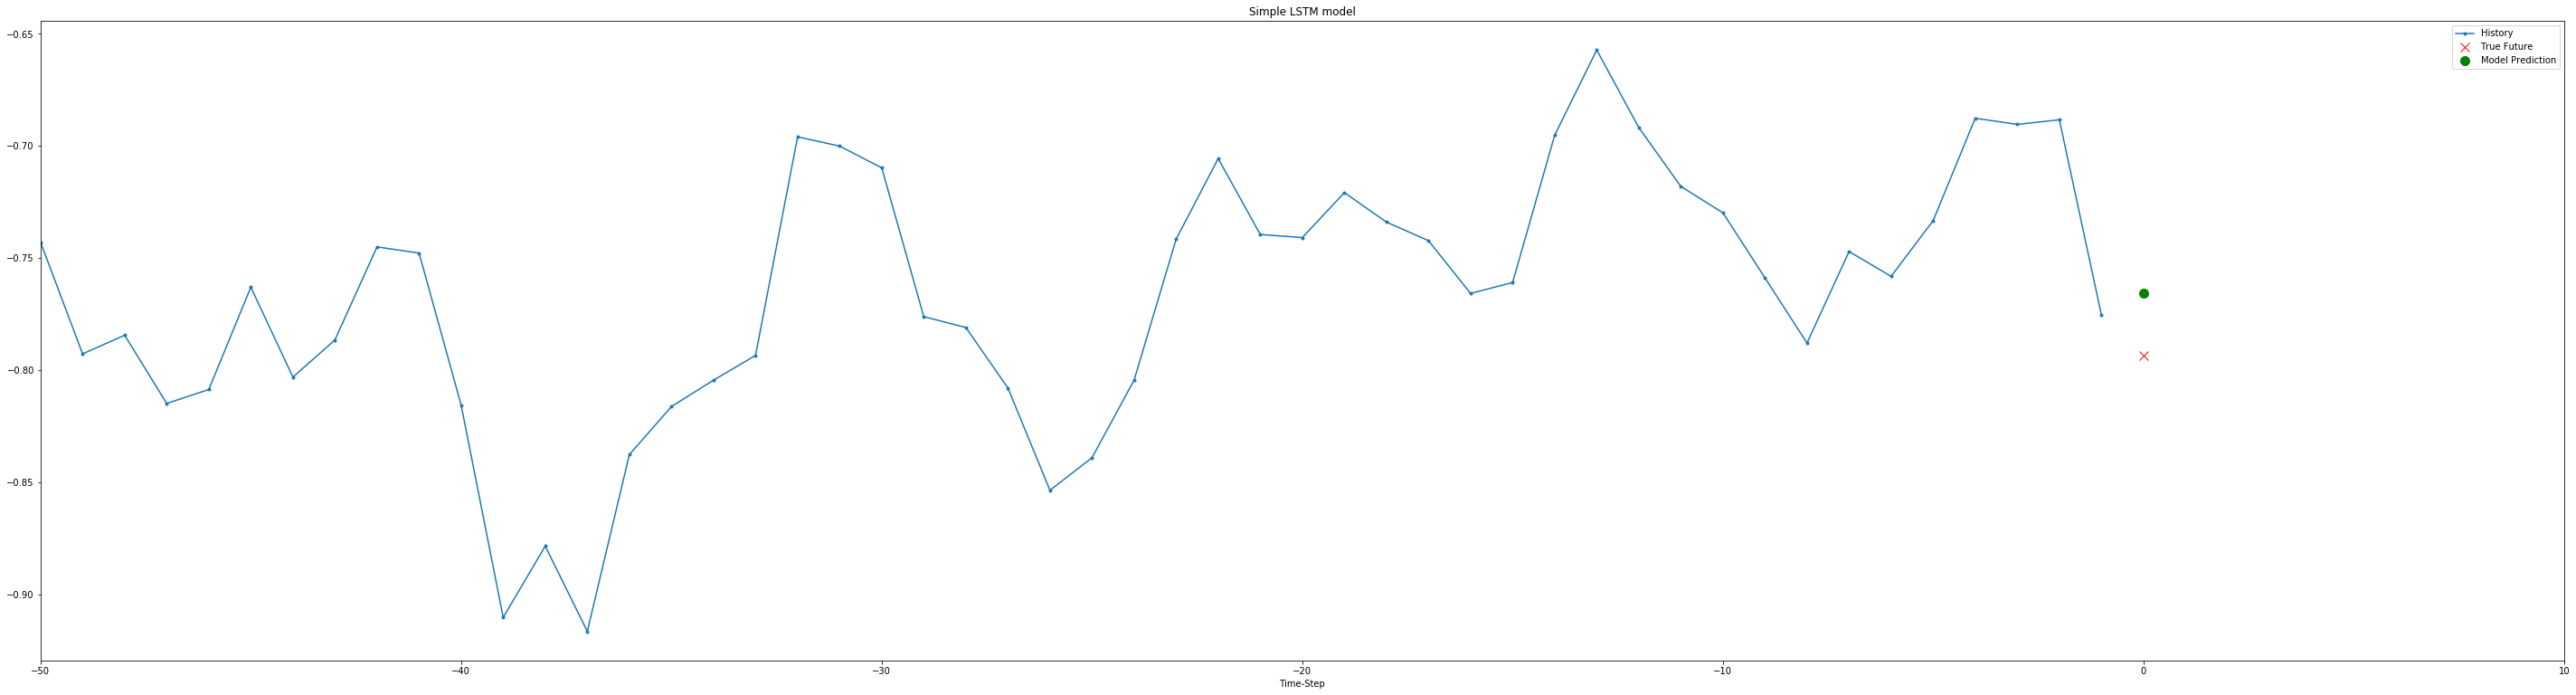

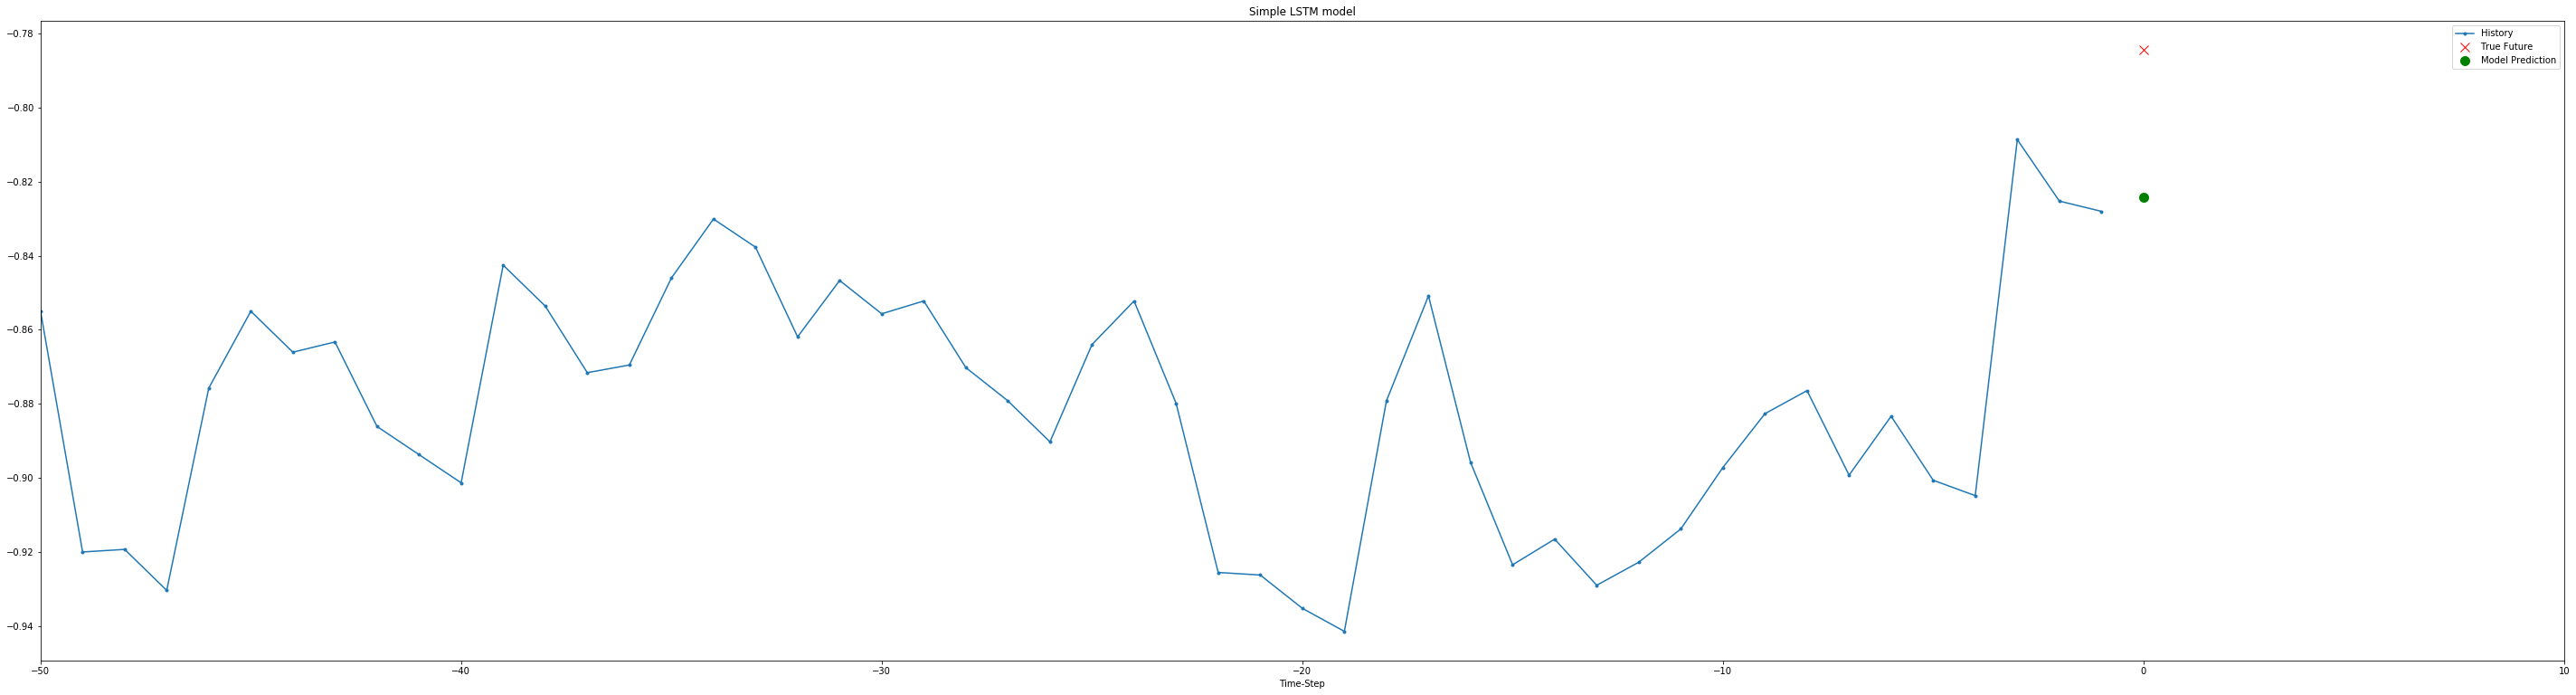

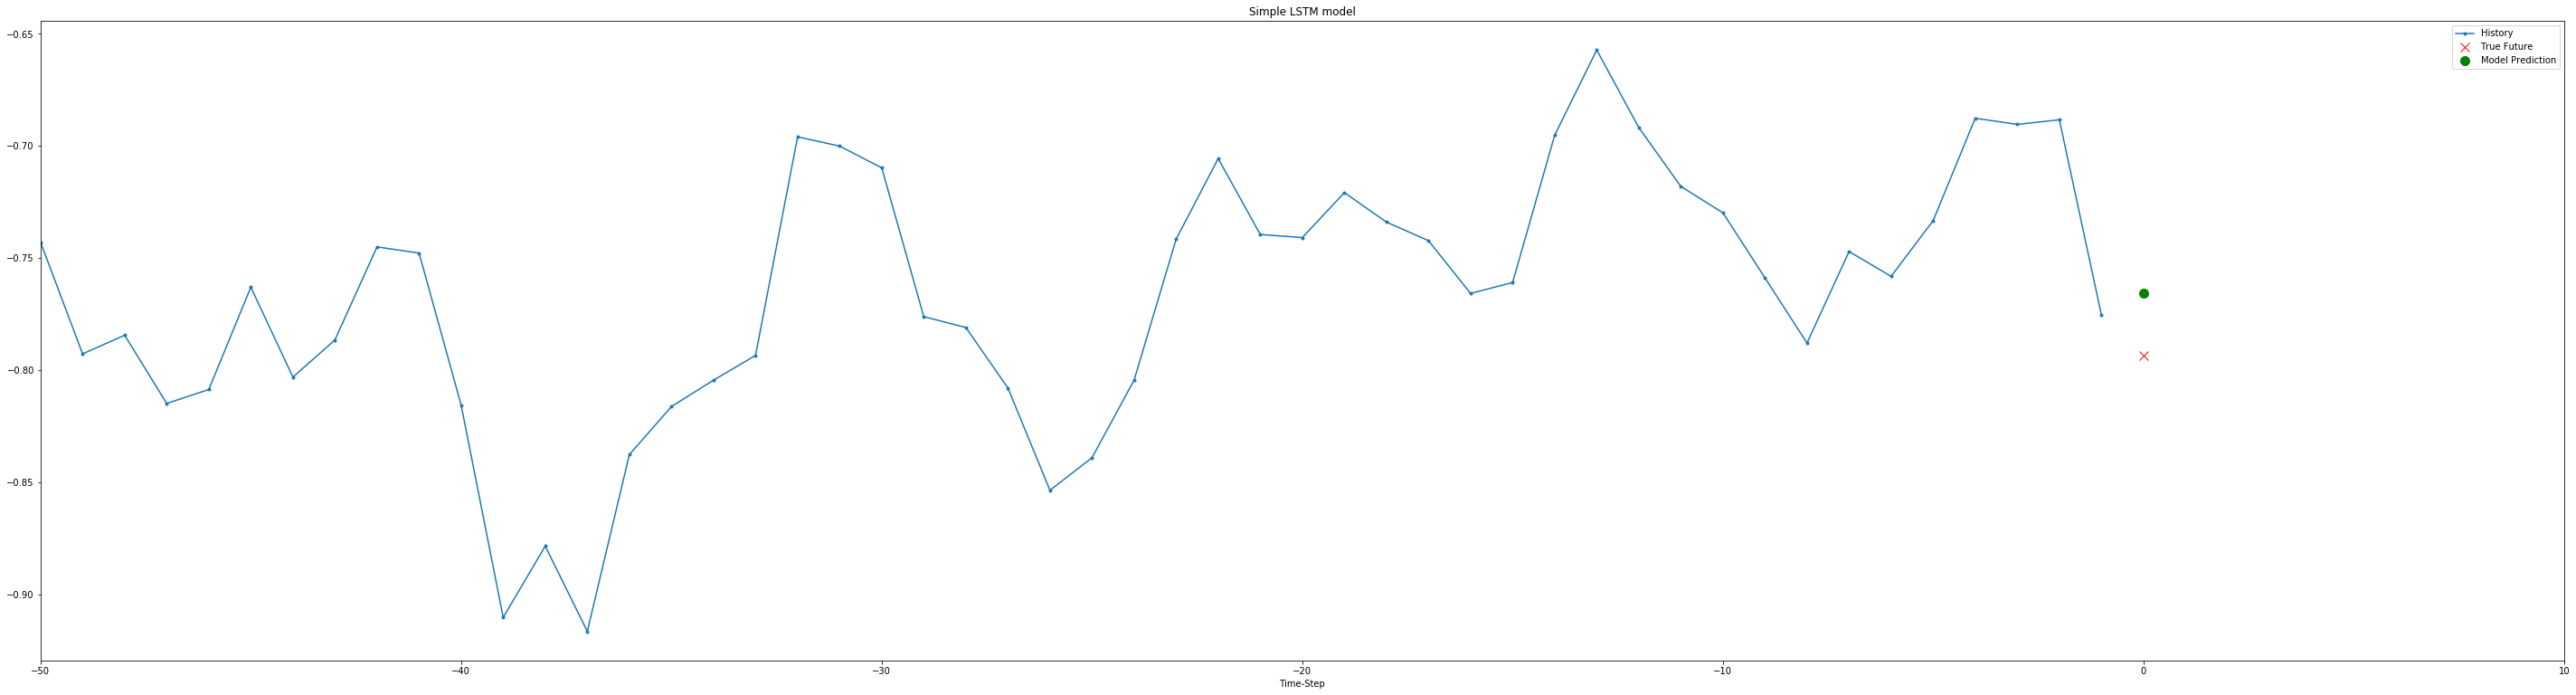

In [196]:
for x, y in val_univariate.take(3):
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()

# Multivariate


In [155]:
features_considered = ['Open', 'High', 'Low', 'Last', 'Change', 'Settle', 'Volume', 'Previous Day Open Interest',
                     'Open_x', 'High_x', 'Low_x', 'Last_x', 'Change_x', 'Settle_x', 'Volume_x', 'Previous Day Open Interest_x',
                      'Open_y', 'High_y', 'Low_y', 'Last_y', 'Change_y', 'Settle_y', 'Volume_y', 'Previous Day Open Interest_y']       

features = com_merge_train[features_considered]
features.index = com_merge_train['Date']
features.head()


,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Open_x,High_x,...,Volume_x,Previous Day Open Interest_x,Open_y,High_y,Low_y,Last_y,Change_y,Settle_y,Volume_y,Previous Day Open Interest_y
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-18,445.00,450.00,444.50,449.4,4.2,449.50,140856.0,332167.0,143.125,143.750,...,3170.0,12231.0,170.700,171.950,170.600,171.700,1.225,171.700,2951.0,12118.0
2014-02-19,448.50,455.25,448.25,454.6,4.2,453.75,243252.0,307257.0,143.725,144.400,...,4006.0,11113.0,171.650,172.100,171.000,171.150,0.525,171.175,2357.0,11190.0
2014-02-20,453.25,456.50,451.00,456.2,2.0,455.75,191899.0,268137.0,143.800,144.975,...,2803.0,9330.0,171.475,171.625,170.875,171.100,0.050,171.125,1607.0,10746.0
2014-02-21,455.50,456.50,450.25,452.2,2.6,453.00,145346.0,244376.0,144.950,145.175,...,4086.0,8240.0,171.225,171.600,170.625,170.675,0.425,170.700,1723.0,10249.0
2014-02-24,451.50,452.75,445.50,451.4,1.4,451.50,142118.0,200173.0,144.700,145.500,...,2708.0,6175.0,170.900,171.350,170.150,170.175,0.500,170.200,1969.0,9793.0


In [91]:
#features.plot(subplots=True)
#matplotlib.rcParams['figure.figsize'] = (50, 13)

In [156]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)
dataset = (dataset-data_mean)/data_std

In [157]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [158]:
past_history = 1000
future_target = 120
STEP = 1

BATCH_SIZE = 256
BUFFER_SIZE = 10000

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [159]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [162]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

ValueError: Input 0 of layer lstm_4 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: [None, 0]

In [ ]:
#https://www.tensorflow.org/tutorials/structured_data/time_series#part_2_forecast_a_multivariate_time_series

In [ ]:
#LSTM
#https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/
#https://medium.com/@vinayarun/from-scratch-an-lstm-model-to-predict-commodity-prices-179e12445c5a
#--> https://www.tensorflow.org/tutorials/structured_data/time_series#part_2_forecast_a_multivariate_time_series

#Stocker and Other
#https://towardsdatascience.com/stock-prediction-in-python-b66555171a2
#https://data-flair.training/blogs/python-for-stock-market/
#https://towardsdatascience.com/how-to-use-machine-learning-to-possibly-become-a-millionaire-predicting-the-stock-market-33861916e9c5
    

In [131]:
live_close = live_data_train.iloc[0:,6]
live_opn = live_data_train.iloc[0:,1]
live_high = live_data_train.iloc[0:,2]
live_low = live_data_train.iloc[0:,3]
live_time = live_data_train.iloc[0:,0]

feeder_close = feeder_data_train.iloc[0:,6]
feeder_opn = feeder_data_train.iloc[0:,1]
feeder_high = feeder_data_train.iloc[0:,2]
feeder_low = feeder_data_train.iloc[0:,3]
feeder_time = feeder_data_train.iloc[0:,0] 

corn_close = corn_data_train.iloc[0:,6]
corn_opn = corn_data_train.iloc[0:,1]
corn_high = corn_data_train.iloc[0:,2]
corn_low = corn_data_train.iloc[0:,3]
corn_time = corn_data_train.iloc[0:,0] 

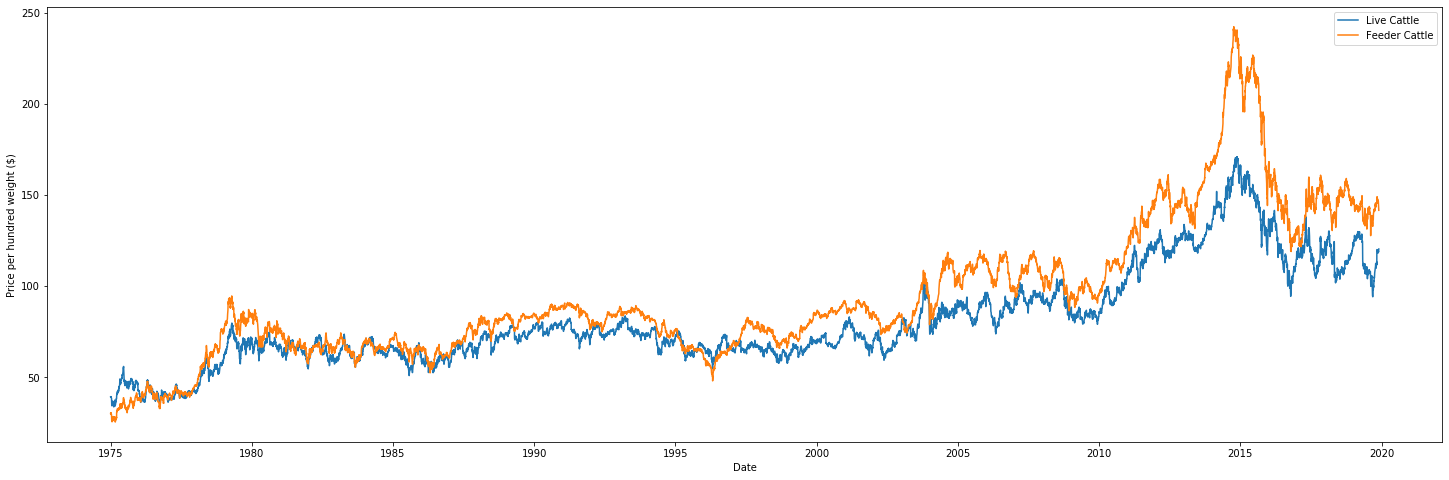

In [37]:
plt.figure(figsize=(25,8))
plt.xlabel("Date")
plt.ylabel("Price per hundred weight ($)")
plt.plot(live_time,live_close, label='Live Cattle')
plt.plot(feeder_time,feeder_close, label = 'Feeder Cattle')

plt.legend()
plt.show()

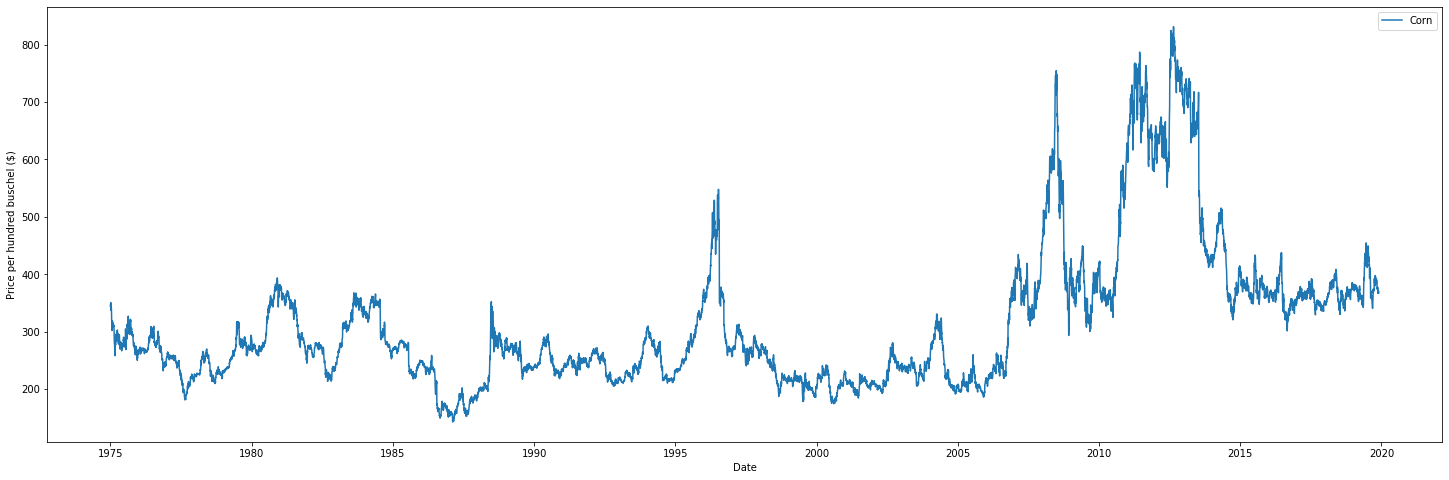

In [38]:
plt.figure(figsize=(25,8))
plt.xlabel("Date")
plt.ylabel("Price per hundred buschel ($)")
plt.plot(corn_time,corn_close, label = 'Corn')
plt.legend()
plt.show()